### DATA CLEANING AND PRE-PROCESSING SECTION

In [6]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#1. Load the dataset into a Pandas DataFrame and display the first 5 rows.
df =pd.read_csv ('/content/cardekho.csv')
df.head()

# name- describes the brand and make of the vehicle. year & selling price give the year each vehicle was manufactired and how much it was sold for.
# km-driven.. means just that. fuel describes the type of fuel the car uses. transmissions are usually manual, auto, or hybrid.
# seller type tells us the kind of person selling the car while owner tells the number of times the vehicle has changed hands.
# mileage refers to how far a vehicle can travel per unit of fuel. engine is a measure of the engine's size and power. seats tell the number of seats the car has.

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [8]:
# 2. Check for missing values in the dataset. Show both the number of missing values per column and the percentage
missing = df.isnull().sum()
percentage_missing= round((missing/len (df))* 100, 2)
data_dict={
    "missing_value_counts": missing,
    "missing_value_percentage": percentage_missing
}
missing_df = pd.DataFrame (data_dict)
missing_df

,missing_value_counts,missing_value_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [9]:
#3. Drop any rows where the target variable (selling price) is missing. Explain why we can’t train a model with missing target values.

df['selling_price'].isnull ().sum ()
# if there were missing values: df.dropna (subset=['selling_price']),inplace=True

# We can’t train a model with missing target values because the model needs complete examples of input-output pairs to learn the relationship between features and the target.
# Without the target, it has no reference for what it's trying to predict, making learning impossible.

np.int64(0)

In [10]:
print (df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


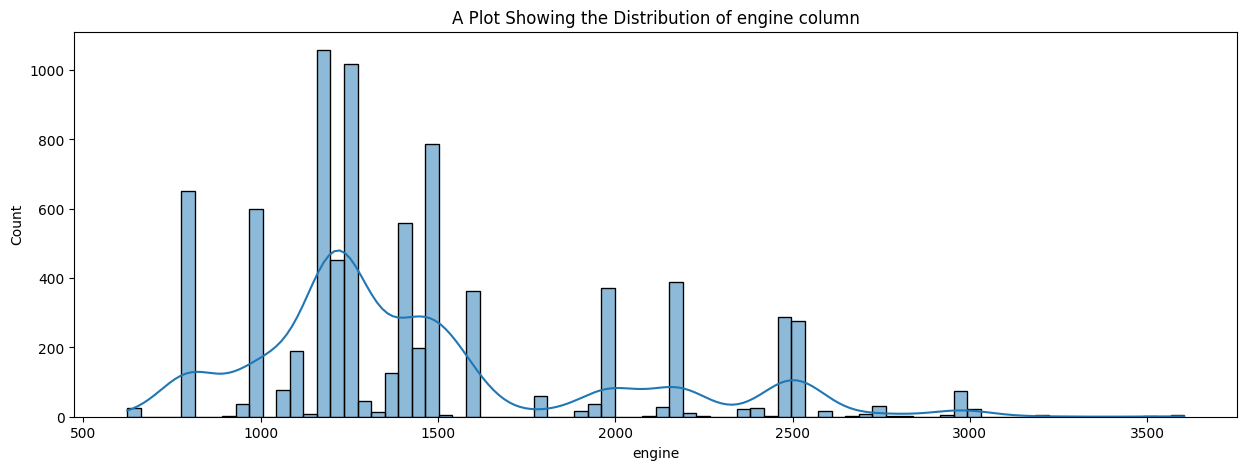

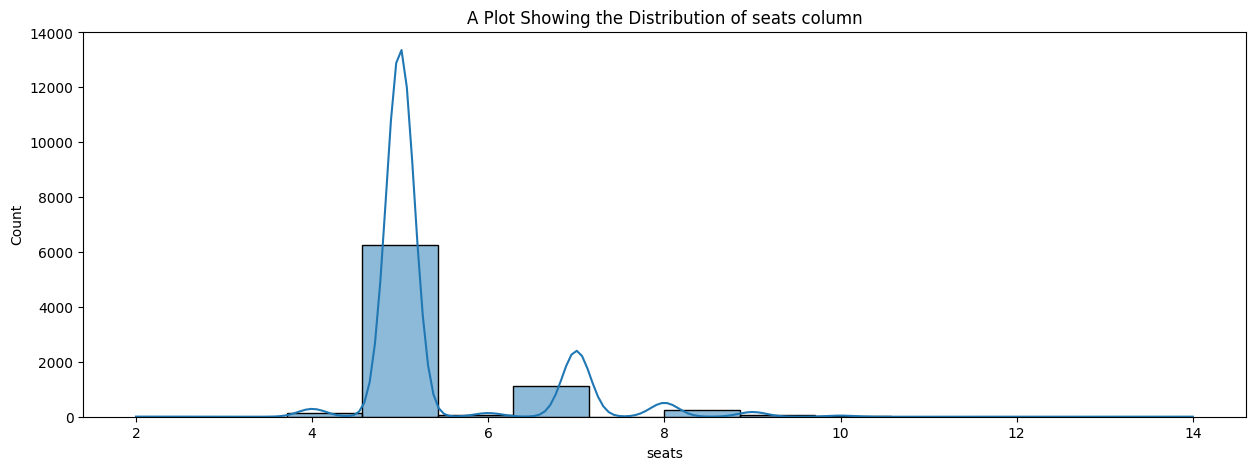

In [12]:
# visualizing engine, max power, and seats
missing_columns=["engine", "seats"]
for col in missing_columns:
  plt.figure(figsize=(15, 5))
  sns.histplot (df, x=df [col], kde= True)
  plt.title (f"A Plot Showing the Distribution of {col} column")
  plt.xlabel (col)


In [13]:

for col in missing_columns:
  df[col]= df[col].fillna(df[col].median())
  print (f"Fill the missing values for: {col}")
  print ("*"*100)

df.isnull().sum()

Fill the missing values for: engine
****************************************************************************************************
Fill the missing values for: seats
****************************************************************************************************


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,0


In [14]:
# 4. Fill missing values in the “mileage” column with the column’s mean. Explain why filling missing values can sometimes be better than dropping rows.
df["mileage(km/ltr/kg)"]= df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()

## Dropping rows can lead to loss of valuable patterns and shrink the sample size, weakening statistical power.
# Filling missing values preserves more data, which can improve model performance.

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [15]:
df['max_power']= df['max_power'].str.strip("'\"")

In [16]:
df['max_power'].replace([','"nan"," ", "none"], np.nan, inplace=True)

/tmp/ipython-input-764042904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].replace([','"nan"," ", "none"], np.nan, inplace=True)


In [17]:
 df["max_power"].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [18]:
df[df['max_power'].apply(lambda x: x is None)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats


In [19]:
med = df["max_power"].mode()
print (med)

0    74
Name: max_power, dtype: object


In [20]:
df['max_power']=pd.to_numeric(df['max_power'])

In [21]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [22]:
med = df["max_power"].median()
print (med)

82.0


In [23]:
df["max_power"]= df["max_power"].fillna(df["max_power"].median())

In [24]:
#5. Remove duplicate rows from the dataset. Explain how duplicate rows can affect model training.

df.duplicated().sum()

# Duplicate rows can skew the model by overrepresenting certain patterns, leading to biased predictions.

np.int64(1202)

In [25]:
df= df.drop_duplicates()

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
print (df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


In [28]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6926 non-null   float64
 11  seats               6926 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [29]:
# 6. Convert the “year” column into the car’s age.
df["car_age"]=(2025-df["year"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [30]:
# 7. Check the unique values in the “fuel type” column.
df["fuel"].unique()

# knowing all possible values avoids missing categories. If you don’t inspect all values first, you might miss rare or inconsistent entries.

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [31]:
# 8. Replace inconsistent values in the “transmission” column.
df["transmission"]= df["transmission"].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [32]:
print (df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')


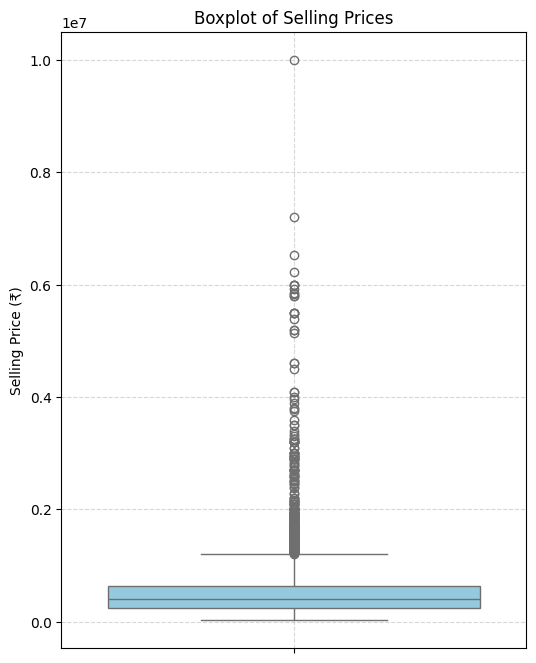

In [33]:
# 9. Check if there are any outliers in the “selling price” column using a boxplot.
plt.figure(figsize=(6, 8))
sns.boxplot(y=df["selling_price"], color="skyblue")

plt.title("Boxplot of Selling Prices")
plt.ylabel("Selling Price (₹)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
# # Why Outliers Can Affect Model Accuracy
# 1. Distort the Model’s Fit- Regression models (like linear regression) try to minimize error across all data points. Outliers have extremely large errors, so the model may bend the line to accommodate them — hurting accuracy for normal cases
# 2. Inflate Error Metrics- Metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are sensitive to large errors. A few extreme values can dominate the loss function, making the model seem worse than it is.

In [34]:
# 10. Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
df = df[(df["selling_price"] >= 10000) & (df["selling_price"] <= 5000000)]

# outliers distort the model’s understanding of typical patterns. By removing unrealistic prices, the model fits better to the majority of cases — improving metrics like RMSE and R².

In [35]:
# 11. Standardize the column names so they are all lowercase and contain underscores instead of spaces.
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [36]:
df.head ()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [37]:
# 12. Check if any numerical columns are stored as strings and convert them to numbers.
print(df.dtypes)


name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
dtype: object


In [38]:
# Columns to convert to int: mileage(km/ltr/kg), engine, max_power, seats

In [39]:
df["seats"] = df["seats"].fillna(0).astype(int)

In [40]:
df["engine"] = df["engine"].fillna(0).astype(int)

In [41]:
df["max_power"] = df["max_power"].fillna(0).astype(int)

In [42]:
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].round().astype("Int64")


In [43]:
print (df.dtypes)

name                  object
year                   int64
selling_price          int64
km_driven              int64
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage(km/ltr/kg)     Int64
engine                 int64
max_power              int64
seats                  int64
car_age                int64
dtype: object


In [44]:
# 13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df["price_per_kilometer"] = df["selling_price"] / df["mileage(km/ltr/kg)"]
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5,11,19565.217391
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5,11,17619.047619
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,18,1497,78,5,19,8777.777778
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5,18,8125.0


In [45]:
# 14. Ensure the dataset index is properly reset after cleaning.
df.reset_index(drop=True, inplace=True)


In [46]:
# 15. Save your cleaned dataset as a new CSV file called cleaned_cars.csv.
df.to_csv("cleaned_cars.csv", index=False)


### EXPLORATORY DATA ANALYSIS (EDA)

In [47]:
# 16. Find the average selling price of cars in the dataset.
av_price= df['selling_price'].mean()
print(f"Average Selling Price: ₹{av_price:,.2f}")

Average Selling Price: ₹501,378.18


In [48]:
# 17. Find the most common fuel type in the dataset.

# most common fuel type
common_fuel = df["fuel"].value_counts().idxmax()

# Display
print(f"The most common fuel type is: {common_fuel}")

The most common fuel type is: Diesel


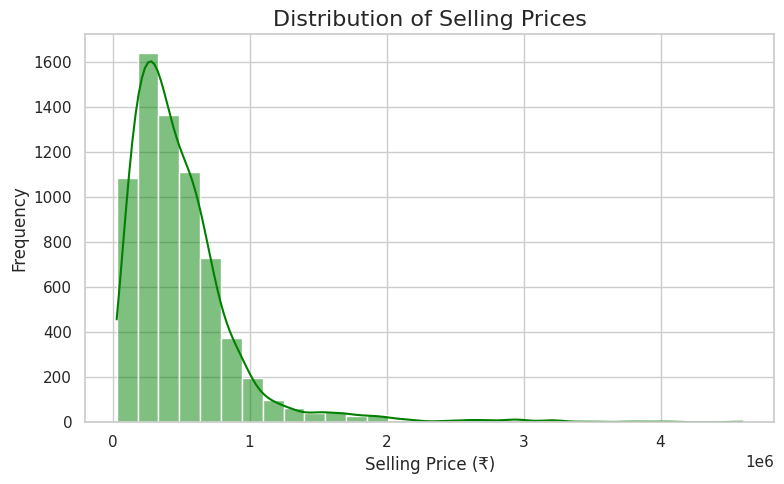

In [94]:
# 18. Plot a histogram of the selling prices.
sns.set(style="whitegrid")

# Create the histogram with a KDE curve
plt.figure(figsize=(8, 5))
sns.histplot(df["selling_price"], bins=30, kde=True, color="green")

# Add labels and title
plt.title("Distribution of Selling Prices", fontsize=16)
plt.xlabel("Selling Price (₹)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

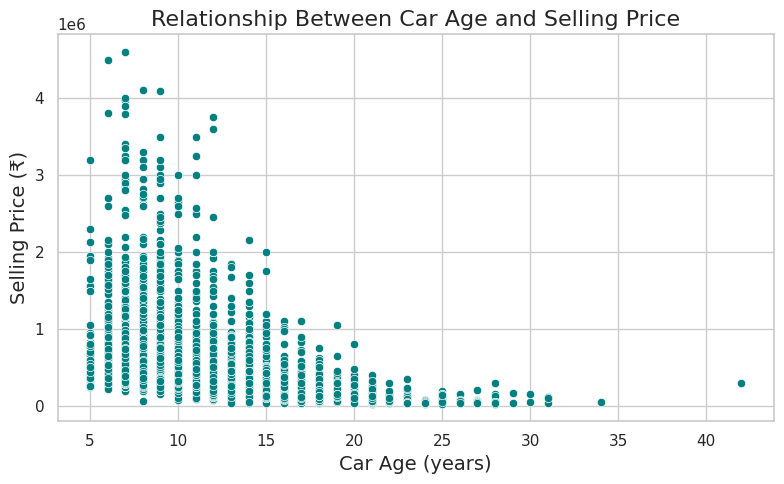

In [50]:
# 19. Plot the relationship between car age and selling price using a scatter plot.
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='car_age', y='selling_price', data=df, color='teal')

# Add labels and title
plt.title('Relationship Between Car Age and Selling Price', fontsize=16)
plt.xlabel('Car Age (years)', fontsize=14)
plt.ylabel('Selling Price (₹)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
# 20. Group cars by fuel type and find the average selling price for each group.
average_prices = df.groupby('fuel')['selling_price'].mean().reset_index()
average_prices = average_prices.sort_values(by='selling_price', ascending=False)

# Display the result
print("Average Selling Price by Fuel Type (High to Low):")
print(average_prices)


Average Selling Price by Fuel Type (High to Low):
     fuel  selling_price
1  Diesel  620448.482224
3  Petrol  363717.339629
0     CNG  300499.946429
2     LPG  200421.052632


/tmp/ipython-input-523818418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')


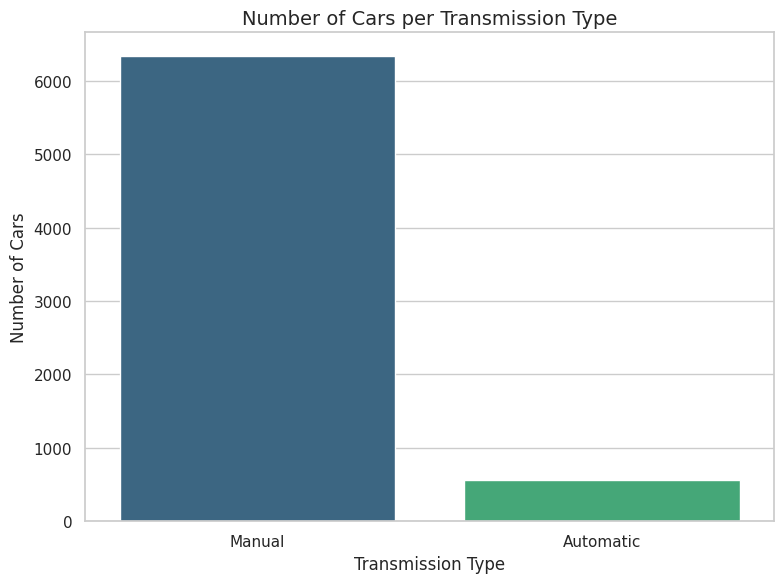

In [52]:
# 21. Plot a bar chart showing the number of cars per transmission type.
sns.set(style="whitegrid")

# no. of cars per transmission type
transmission_counts = df['transmission'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')
plt.title('Number of Cars per Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
# 22. Find the car with the highest mileage in the dataset.
# highest mileage car
highest_mileage_car = df.loc[df['mileage(km/ltr/kg)'].idxmax()]

# Display the result
print("Car with the highest mileage:")
print(highest_mileage_car)

Car with the highest mileage:
name                   Maruti Alto 800 CNG LXI Optional
year                                               2019
selling_price                                    330000
km_driven                                         10000
fuel                                                CNG
seller_type                                  Individual
transmission                                     Manual
owner                                      Second Owner
mileage(km/ltr/kg)                                   33
engine                                              796
max_power                                            40
seats                                                 4
car_age                                               6
price_per_kilometer                             10000.0
Name: 35, dtype: object


In [54]:
# 23. Calculate the correlation between mileage and selling price.
# Calculate correlation
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])

# Display the result
print(f"Correlation between mileage and selling price: {correlation:.2f}")

Correlation between mileage and selling price: -0.12


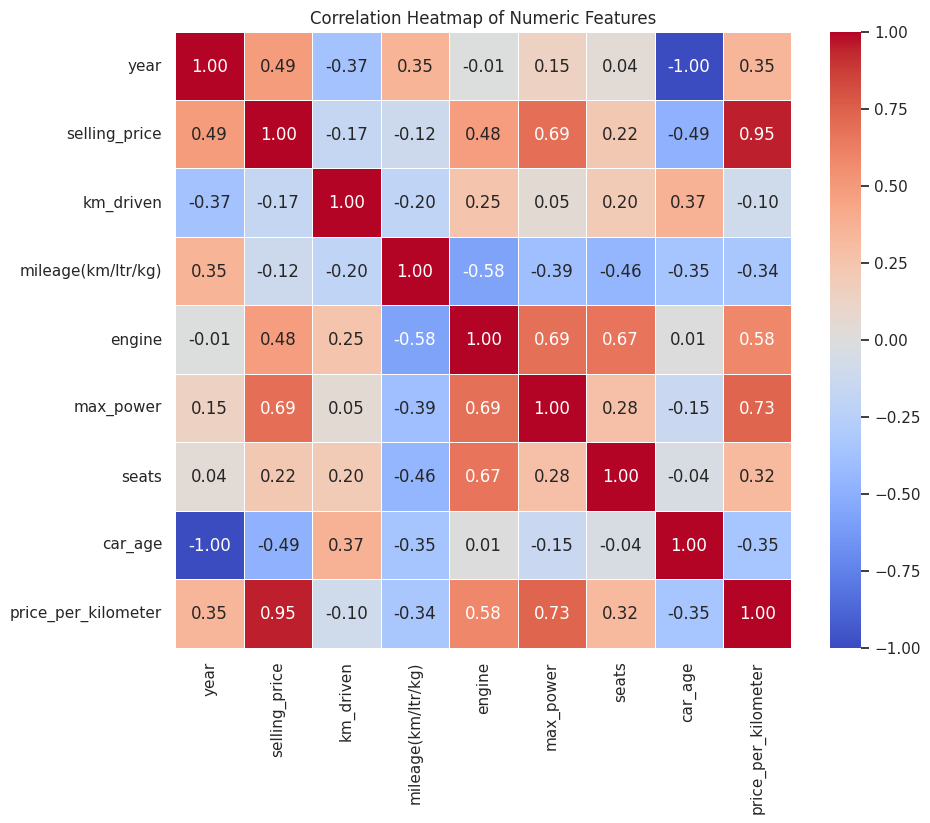

In [55]:
# 24. Plot a heatmap showing the correlations between all numeric columns.
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numeric Features")

# Show plot
plt.show()

In [56]:
# 25. Check if manual cars are generally cheaper or more expensive than automatic cars.
# Grouping by transmission and calculate average selling price
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()

# Display the result
print("Average Selling Price by Transmission Type:")
print(avg_price_by_transmission)

Average Selling Price by Transmission Type:
transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


In [57]:
# 26. Find the average selling price for each year of manufacture.
av_sellingby_year= df.groupby('year')['selling_price'].mean()
print (f"selling price by year of manufacture:")
print (av_sellingby_year)

selling price by year of manufacture:
year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    708006.173913
2018    825749.553897
2019    795583.291667
2020    786548.338710
Name: selling_price, dtype: float64


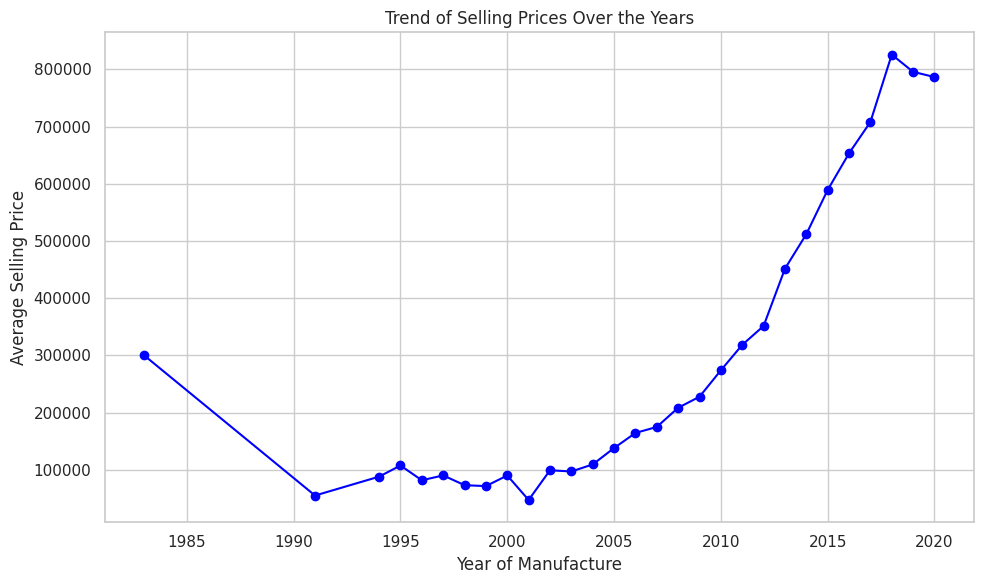

In [58]:
# 27. Plot a line chart showing the trend of selling prices over the years.
avg_price_by_year = df.groupby('year')['selling_price'].mean().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='blue')
plt.title("Trend of Selling Prices Over the Years")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# 28. Find the most expensive car for each fuel type.
x1 = df.groupby('fuel')['selling_price'].idxmax()
most_expensive = df.loc[x1]

print("The most expensive car for each fuel type:")
print (most_expensive)

The most expensive car for each fuel type:
                                          name  year  selling_price  \
4961     Maruti Ertiga VXI CNG Limited Edition  2014         545000   
283   Mercedes-Benz GL-Class 220d 4MATIC Sport  2018        4600000   
2783               Hyundai i10 Sportz 1.1L LPG  2015         375000   
133            Jeep Wrangler 2016-2019 3.6 4X4  2017        4100000   

      km_driven    fuel seller_type transmission        owner  \
4961      35000     CNG  Individual       Manual  First Owner   
283        7976  Diesel  Individual    Automatic  First Owner   
2783      60000     LPG  Individual       Manual  First Owner   
133       17000  Petrol  Individual    Automatic  First Owner   

      mileage(km/ltr/kg)  engine  max_power  seats  car_age  \
4961                  23    1373         80      7       11   
283                   18    2143        170      5        7   
2783                  19    1086         68      5       10   
133                   1

In [60]:
# 29. Find out which brand appears most frequently in the dataset.
common_brand = df['name'].value_counts().idxmax()
print (f"The most common brand is: {common_brand}")

The most common brand is: Maruti Swift Dzire VDI


In [61]:
# 30. Check the top 5 most common combinations of fuel type and transmission.
common_combos = df.groupby(['fuel', 'transmission']).size().sort_values(ascending=False).head(5)
print (common_combos)

fuel    transmission
Diesel  Manual          3457
Petrol  Manual          2791
Diesel  Automatic        284
Petrol  Automatic        280
CNG     Manual            56
dtype: int64


### MACHINE LEARNING

In [62]:
# 31. What are the main assumptions of Linear Regression, and how can you check them using this dataset?

# 1. Linearity: The relationship between the independent variables and the dependent variable is assumed to be linear.
# This means that changes in the predictors lead to proportional changes in the outcome.

# 2. Homoscedasticity: The variance of the residuals should remain constant across all levels of the independent variables.
# If the spread of errors increases or decreases with the predicted values, this assumption is violated.Independence of errors:

# 3.Normality of Residuals: The residuals should be approximately normally distributed.
# This is especially important for constructing valid confidence intervals and hypothesis tests.

# 4. No Multicollinearity: The independent variables should not be highly correlated with each other.
# High multicollinearity can distort the estimated coefficients and make it difficult to assess the individual effect of each predictor.

# 5. Independence of errors- The observations in the dataset should be independent of one another.
# In other words, the residuals (errors) from one observation should not be correlated with those from another.


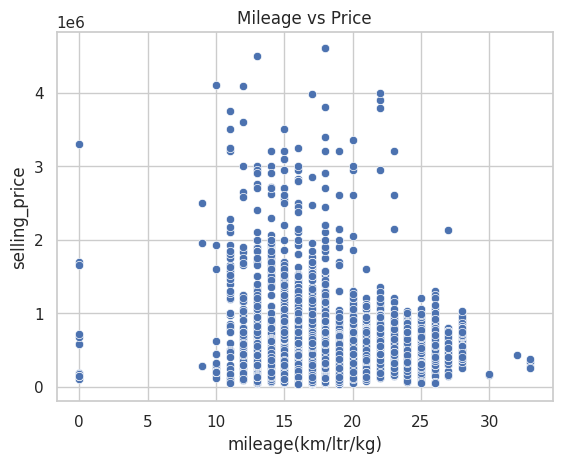

In [63]:
# linearity (Scatter plot for a numeric predictor)
sns.scatterplot(x=df['mileage(km/ltr/kg)'], y=df['selling_price'])
plt.title('Mileage vs Price')
plt.show()

In [64]:
# independence
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson

# Example predictors and target
X = df[['mileage(km/ltr/kg)']]  # or multiple columns
y = df['selling_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Check independence
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.894671108349279


DW = 2.04
- suggests that the residuals are independent.
- This supports the independence assumption of linear regression.
- No signs of autocorrelation, which is especially good if your data has any time-based or sequential structure.


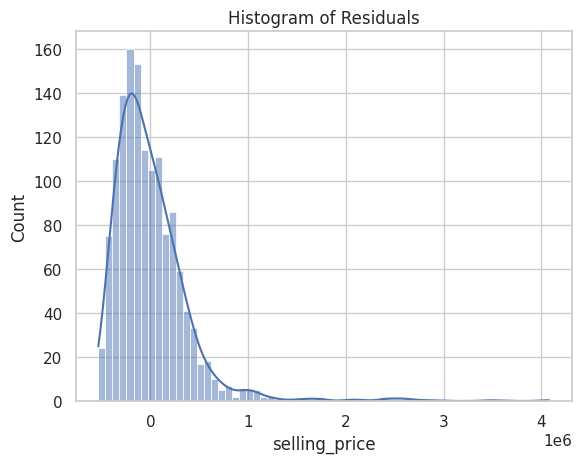

In [65]:
# normality of residuals
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

- The residuals do not follow a normal distribution, which may affect the reliability of statistical inference (like p-values and confidence intervals)


In [74]:
print (df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age', 'price_per_kilometer'],
      dtype='object')


In [82]:
print (df.dtypes)

name                   float64
year                     int64
selling_price            int64
km_driven                int64
fuel                   float64
seller_type            float64
transmission           float64
owner                  float64
mileage(km/ltr/kg)       Int64
engine                   int64
max_power                int64
seats                    int64
car_age                  int64
price_per_kilometer    Float64
dtype: object


In [83]:
# Replace problematic strings with NaN
df.replace(['Unknown', 'null', 'None'], np.nan, inplace=True)

# Clean numeric columns
def extract_numeric(value):
    try:
        return float(str(value).split()[0])
    except:
        return np.nan

for col in ['engine', 'max_power', 'mileage(km/ltr/kg)']:
    df[col] = df[col].apply(extract_numeric)

# Drop or fill missing values
df.dropna(subset=['engine', 'max_power', 'mileage(km/ltr/kg)', 'price_per_kilometer'], inplace=True)

# Replace inf with NaN and drop
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


In [85]:
# 32. Train a Linear Regression model to predict the car’s selling price using selected features.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


# Encode Categorical Column
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Define features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train
model = LinearRegression()
model.fit(X_train, y_train)

# eval
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# the model is performing quite well overall. The R² score of 0.95 means it explains 95% of the variance in car selling prices.



Mean Squared Error: 8689440339.57
R² Score: 0.95


In [86]:
# 34. Apply Lasso Regression on the dataset and compare its performance with Linear Regression. Explain what Lasso Regression does differently and why it can be useful when you have many features.

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# eval:
# Linear Regression metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Lasso Regression metrics
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Linear Regression:")
print(f"  MSE: {lr_mse:.2f}")
print(f"  R²: {lr_r2:.2f}")

print("\nLasso Regression:")
print(f"  MSE: {lasso_mse:.2f}")
print(f"  R²: {lasso_r2:.2f}")

coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr_model.coef_,
    'Lasso': lasso_model.coef_
})
print(coeffs)

# Lasso Regression performed almost identically to Linear Regression on your dataset. Both models achieved an R² score of 0.95, meaning they explain 95% of the variance in selling price.
# Lasso Regression adds an L1 penalty to the loss function, which shrinks less important feature coefficients toward zero — effectively performing feature selection. This makes it especially useful when working with many features, as it helps reduce model complexity and prevent overfitting.


Linear Regression:
  MSE: 8689440339.57
  R²: 0.95

Lasso Regression:
  MSE: 8689374949.01
  R²: 0.95
                Feature        Linear         Lasso
0                  name    -18.565625    -18.565602
1                  year   4120.792292  17264.085255
2             km_driven     -0.109143     -0.109148
3                  fuel -19754.668849 -19751.923881
4           seller_type -18717.267321 -18706.812669
5          transmission -15552.987120 -15535.669816
6                 owner  -4688.089096  -4687.596739
7    mileage(km/ltr/kg)  18183.346203  18183.813874
8                engine    -24.104251    -24.104819
9             max_power    976.860184    976.933203
10                seats  -1437.414081  -1435.747972
11              car_age  -4120.792292   9022.556396
12  price_per_kilometer     13.357250     13.357330


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.193e+13, tolerance: 1.001e+11
  model = cd_fast.enet_coordinate_descent(


In [87]:
# 35. Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression

from sklearn.linear_model import Ridge

# train
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# eval:
# linear reg
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  MSE: {mse:.2f}\n  R²: {r2:.2f}\n")

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Lasso Regression", y_test, lasso_pred)
evaluate("Ridge Regression", y_test, ridge_pred)

# All three models — Linear, Lasso, and Ridge Regression — achieved an R² score of 0.95, meaning they explain 95% of the variance in car selling prices.
# The Mean Squared Error values are nearly identical, with Ridge performing slightly better, followed closely by Lasso and then Linear.
# This tells us that regularization (Lasso and Ridge) helped marginally reduce prediction error while maintaining strong overall accuracy.

Linear Regression:
  MSE: 8689440339.57
  R²: 0.95

Lasso Regression:
  MSE: 8689374949.01
  R²: 0.95

Ridge Regression:
  MSE: 8689217631.75
  R²: 0.95



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.193e+13, tolerance: 1.001e+11
  model = cd_fast.enet_coordinate_descent(


In [88]:
# 36. Use cross-validation to evaluate your Ridge Regression model.

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# initialize
ridge_model = Ridge(alpha=1.0)

# cross validation
# Use 5-fold cross-validation and negative MSE scoring
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE
mse_scores = -scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Ridge Regression Cross-Validated MSE: {mean_mse:.2f} ± {std_mse:.2f}")
# Cross-validation gives a better estimate of model performance because it tests the model on multiple subsets of the data, reducing the risk of overfitting to a single train-test split.
# This leads to a more stable and reliable evaluation, especially when the dataset is small or has uneven distributions.



Ridge Regression Cross-Validated MSE: 8147226299.24 ± 1587968185.90


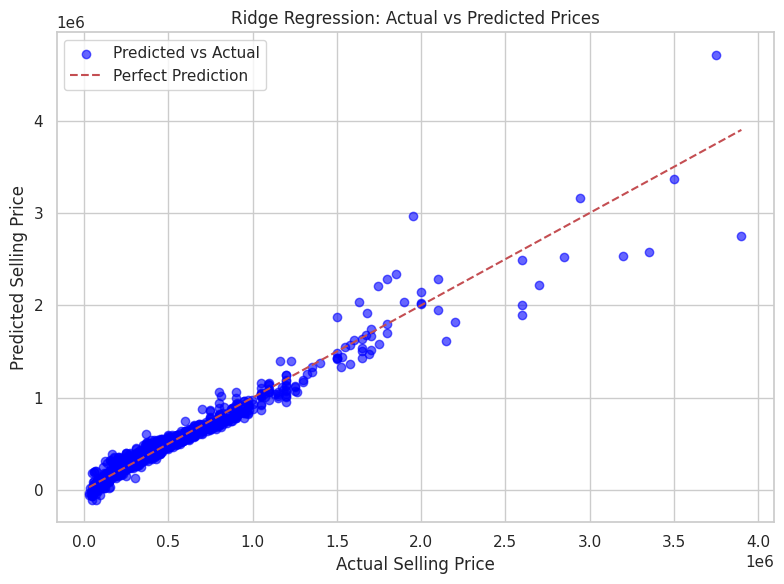

In [91]:
# 37. Plot the predicted vs actual prices for your best-performing model.
# best performing model- Ridge.


from sklearn.linear_model import Ridge

# Initialize and fit
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Now make predictions
ridge_pred = ridge_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Most dots near the lower end (left side) are clustered close to the red line, meaning the model is doing a solid job predicting cheaper cars.
#  Increasing error at higher prices: As you move to the right (higher actual prices), the dots start to scatter more widely above and below the red line. That suggests the model struggles to predict expensive cars accurately




In [92]:
# 38. Use GridSearchCV to find the best alpha value for Ridge Regression.

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid & try a range of alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Initializing Ridge
ridge = Ridge()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           cv=5,                # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # or 'r2'
                           n_jobs=-1)           # Use all available cores

# Fit to training data
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Alpha controls the strength of regularization in Ridge and Lasso regression. It makes the higher values shrink coefficients more aggressively to reduce model complexity and prevent overfitting.
# Tuning alpha is crucial because it helps find the right balance between bias and variance, improving predictive accuracy.


Best alpha: 10


In [93]:
# 39. Try Polynomial Regression on the dataset.
from sklearn.preprocessing import PolynomialFeatures

# Create features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# fit linear reg
from sklearn.linear_model import LinearRegression

# Fit model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict
poly_pred = poly_model.predict(X_test_poly)

# eval
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, poly_pred)FF
r2 = r2_score(y_test, poly_pred)

print(f"Polynomial Regression (degree 2) - MSE: {mse:.2f}, R²: {r2:.2f}")


Polynomial Regression (degree 2) - MSE: 0.00, R²: 1.00


## Polynomial Regression (degree 2) - MSE: 0.00, R²: 1.00
# possible overfitting

## Linear Regression: MSE: 8689440339.57 R²: 0.95
# Already performs quite well, explaining 95% of the variance. The high MSE suggests large errors on some predictions

# Polynomial regression is useful when the relationship between features and the target variable is nonlinear but still smooth and continuous. It’s also useful when interactions between features matter.




In [ ]:
#40. Summarize your findings:

- Polynomial Regression gave perfect results. That is unusual. It may have memorized the data instead of learning real patterns.
- Linear Regression was good but missed some of the complex relationships in the data.
- Ridge Regression was the best overall — it predicted well and stayed realistic. It didn’t overfit, and handled the data better.

